# Introduction

QA plots for the TPC detector

In [1]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

In [2]:
# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 

## `pyROOT` env check

In [3]:
import ROOT

OFFLINE_MAIN = os.getenv("OFFLINE_MAIN")
if OFFLINE_MAIN is not None:
    display(Markdown(f"via sPHENIX software distribution at `{OFFLINE_MAIN}`"))

Welcome to JupyROOT 6.24/06


via sPHENIX software distribution at `/cvmfs/sphenix.sdcc.bnl.gov/gcc-8.3/release/release_new/new.2`


# Initialization

In [4]:
%%cpp -d


#include <sPhenixStyle.C>

#include <TFile.h>
#include <TLine.h>
#include <TString.h>
#include <TTree.h>
#include <cassert>
#include <cmath>

In [5]:
%%cpp

SetsPhenixStyle();
TVirtualFitter::SetDefaultFitter("Minuit2");
gSystem->Load("libg4eval")

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode
(int) 0


## Inputs and file checks

In [6]:
%%cpp
TFile *file = new TFile("data/MDC2_Run40_FTFP_BERT.g4hits.list.DSTReader.root");
TTree * T = nullptr; 

file->GetObject("T", T);

{
    T->Draw(">>elist", "Entry$<10", "entrylist");
    TEntryList *elist = (TEntryList*)gDirectory->Get("elist");
    T->SetEntryList(elist);
}


TFile *file_HP = new TFile("data/MDC2_Run41_FTFP_BERT_HP.g4hits.list.DSTReader.root");
TTree * T_HP = nullptr; 

file_HP->GetObject("T", T_HP);

{
    T_HP->Draw(">>elist", "Entry$<10", "entrylist");
    TEntryList *elist = (TEntryList*)gDirectory->Get("elist");
    T_HP->SetEntryList(elist);
}

In [7]:
# ROOT.T.Show(0)

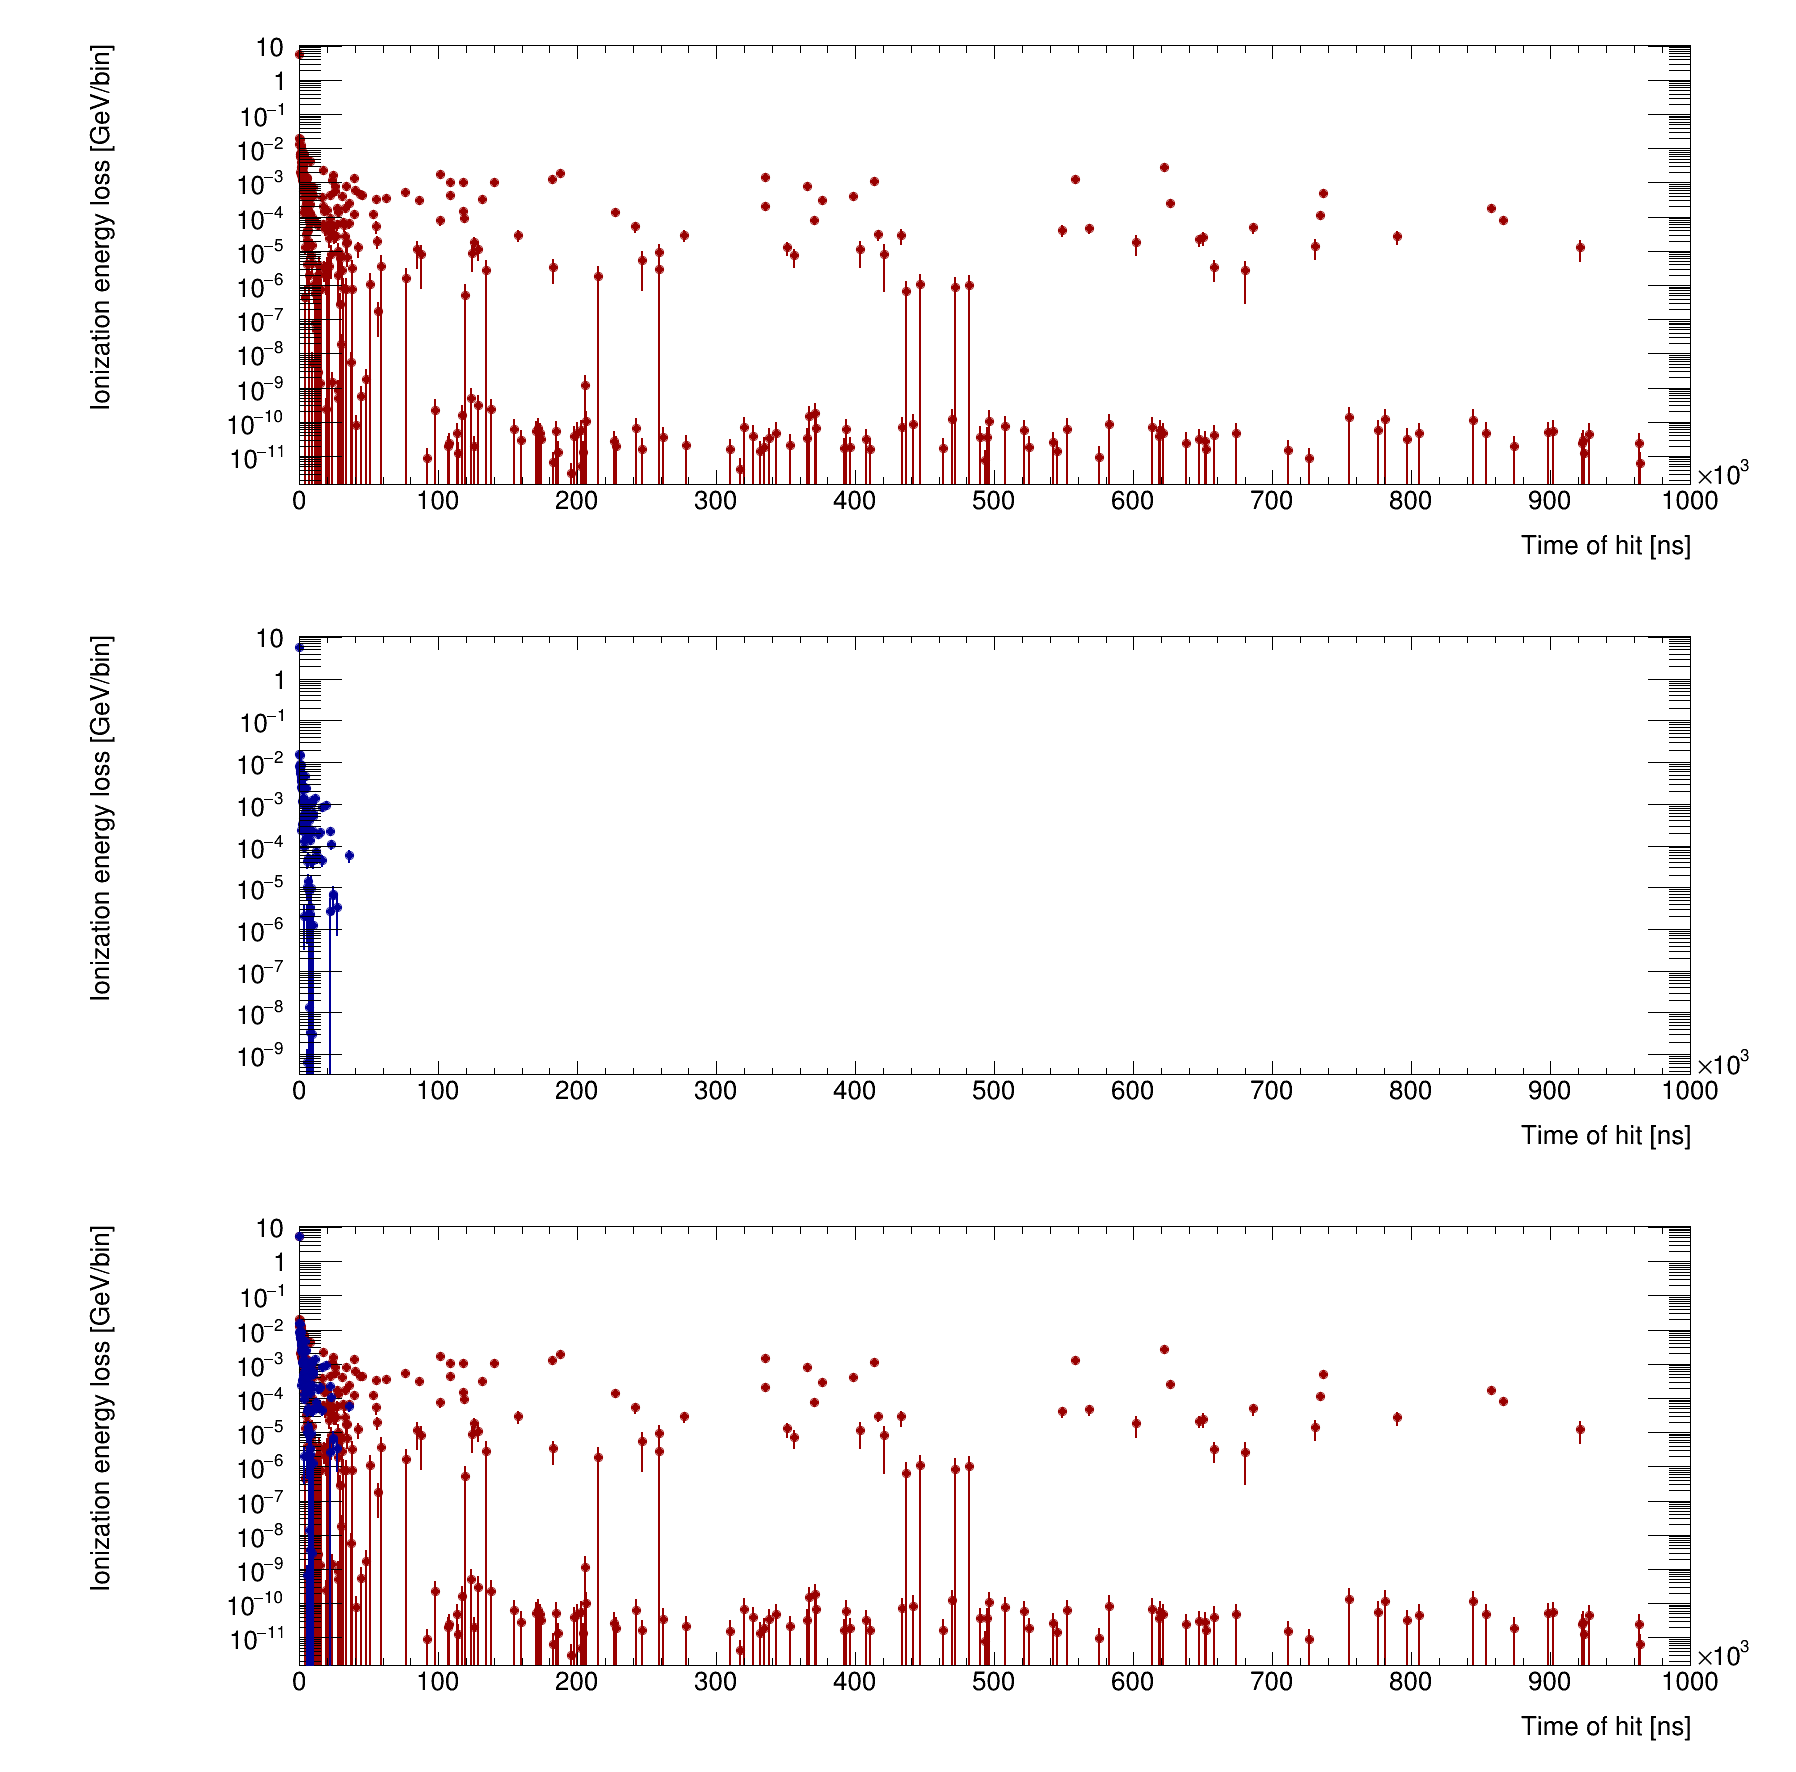

In [8]:
%%cpp

TH1 * h_eIonTPCHitTime_HP = new TH1F("h_eIonTPCHitTime_HP",";Time of hit [ns];Ionization energy loss [GeV/bin]",10000,0,1000000);
TH1 * h_eIonTPCHitTime = new TH1F("h_eIonTPCHitTime",";Time of hit [ns];Ionization energy loss [GeV/bin]",10000,0,1000000);
{

    auto c1 = new TCanvas(TString("TimeScan") ,
                        TString("TimeScan"),
                        1800, 1800);

    c1->Divide(1, 3);
    int idx = 1;
    TPad *p;

    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
        p->SetLogy();
        
        h_eIonTPCHitTime_HP->SetMarkerColor(kRed+2);
        h_eIonTPCHitTime_HP->SetLineColor(kRed+2);
        T_HP->Draw("G4HIT_TPC[].t[0]>>h_eIonTPCHitTime_HP","G4HIT_TPC[].edep");
        
    }

    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
        p->SetLogy();
        
        h_eIonTPCHitTime->SetMarkerColor(kBlue+2);
        h_eIonTPCHitTime->SetLineColor(kBlue+2);
        T->Draw("G4HIT_TPC[].t[0]>>h_eIonTPCHitTime","G4HIT_TPC[].edep");
        
    }
    
    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
        p->SetLogy();
        h_eIonTPCHitTime_HP->DrawClone();
        h_eIonTPCHitTime->DrawClone("SAME");
        
    }

    
    c1->Draw();
}

In [9]:
%%cpp -d

TH1 * NormalizedIntegral(TH1 * h)
{
    TH1 * hIntegral = (TH1 *)h->Clone(TString(h->GetName()) + "_NormalizedIntegral");
    
    const double bin1 = h->GetBinContent(1);
    double integral = 0;
    for (int bin = h->GetNbinsX()+1; bin>=1; --bin)
    {
        integral += h->GetBinContent(bin)/bin1;
        hIntegral->SetBinContent(bin, integral);
    }

    return hIntegral;
}

Warning in <TCanvas::Constructor>: Deleting canvas with same name: TimeIntegral


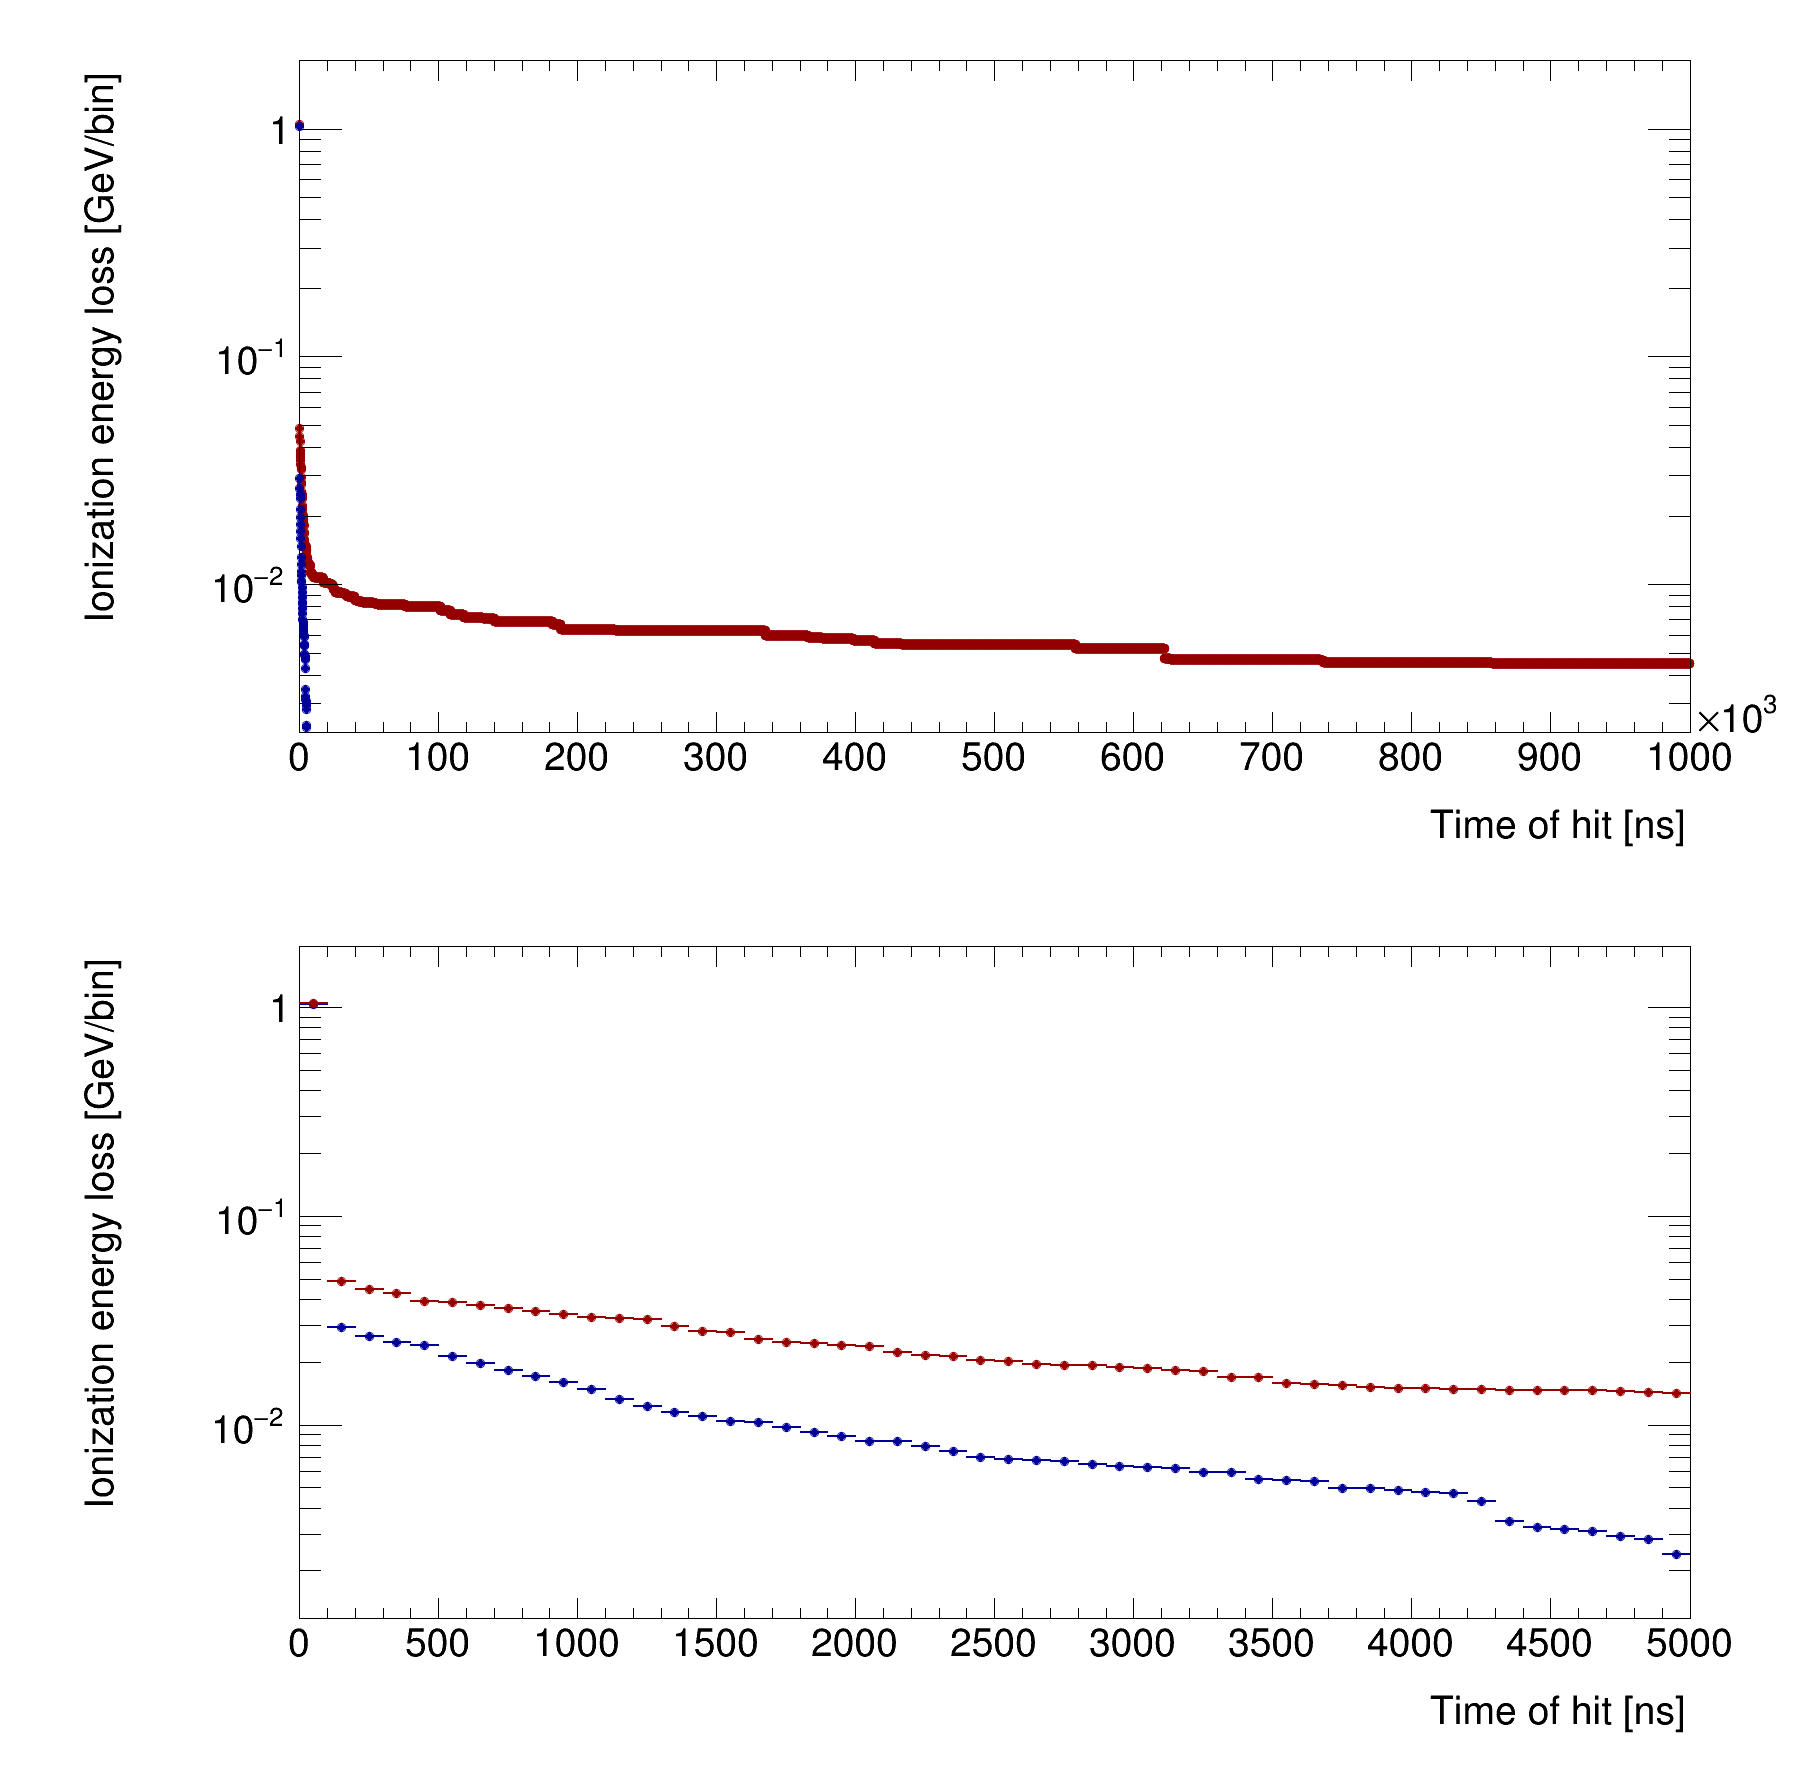

In [16]:
%%cpp

TH1 * h_eIonTPCHitTime_HP_NormalizedIntegral = NormalizedIntegral(h_eIonTPCHitTime_HP);
TH1 * h_eIonTPCHitTime_NormalizedIntegral = NormalizedIntegral(h_eIonTPCHitTime);
{

    auto c1 = new TCanvas(TString("TimeIntegral") ,
                        TString("TimeIntegral"),
                        1800, 1800);

    c1->Divide(1, 2);
    int idx = 1;
    TPad *p;

    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
        p->SetLogy();
        h_eIonTPCHitTime_HP_NormalizedIntegral->DrawClone();
        h_eIonTPCHitTime_NormalizedIntegral->DrawClone("SAME");
        
    }
    
    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
        p->SetLogy();
        TH1 * h = (TH1 *) h_eIonTPCHitTime_NormalizedIntegral->DrawClone();
        h_eIonTPCHitTime_HP_NormalizedIntegral->DrawClone("SAME");
        h->GetXaxis()->SetRangeUser(0,5000);
    }

    
    c1->Draw();
}

In [11]:
%%cpp
T_pi->Show(2);

input_line_259:2:3: error: use of undeclared identifier 'T_pi'
 (T_pi->Show(2))
  ^
Error in <HandleInterpreterException>: Error evaluating expression (T_pi->Show(2)).
Execution of your code was aborted.


In [12]:
%%cpp

{
    
    const char *hist_name_prefix = "TowerPatch_HCAL";
    auto c1 = new TCanvas(TString("TowerPatch_HCAL") ,
                        TString("TowerPatch_HCAL"),
                        1800, 700);

    c1->Divide(2, 1);
    int idx = 1;
    TPad *p;

    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
        //p->SetLogz();
        p->SetRightMargin(0.2);
        
        
        TH2F * hpatch2D_mu = new TH2F("hpatch2D_mu",";#mu^{+}: #eta bin in Outer Hcal patch;#mu^{+}: #phi bin in Outer Hcal patch;Average tower energy [GeV]",7,-3.5,3.5,7,-3.5,3.5);
        T_mu->Draw("HCALOUT_Tower_iPhi_patch:HCALOUT_Tower_iEta_patch>>hpatch2D_mu","HCALOUT_Tower_E","colz");
        hpatch2D_mu->Scale(1. / hpatch2D_mu->GetSum());
        
        
      TLegend *leg = new TLegend(.2,.75,.7,.93, "#splitline{#splitline{#it{#bf{ECCE}} Simulation}{Single particle in barrel calo.}}{|#eta|<1, 0.5<p<20 GeV}");
      // leg->AddEntry("","","");
      leg->Draw();
        
    }
    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
        //p->SetLogz();
        p->SetRightMargin(0.2);
        
        TH2F * hpatch2D_pi = new TH2F("hpatch2D_pi",";#pi^{+}: #eta bin in Outer Hcal patch;#pi^{+}: #phi bin in Outer Hcal patch;Average tower energy [GeV]",7,-3.5,3.5,7,-3.5,3.5);
        T_pi->Draw("HCALOUT_Tower_iPhi_patch:HCALOUT_Tower_iEta_patch>>hpatch2D_pi","HCALOUT_Tower_E","colz");
                hpatch2D_pi->Scale(1. / hpatch2D_pi->GetSum());

    }


    c1->Draw(); 
      c1->Print("TowerPatch_HCAL.pdf");
      c1->Print("TowerPatch_HCAL.png");
}

input_line_261:2:3: error: use of undeclared identifier 'T_mu'
 (T_mu->Draw("HCALOUT_Tower_iPhi_patch:HCALOUT_Tower_iEta_patch>>hpatch2D_mu", "HCALOUT_Tower_E", "colz"))
  ^
Error in <HandleInterpreterException>: Error evaluating expression (T_mu->Draw("HCALOUT_Tower_iPhi_patch:HCALOUT_Tower_iEta_patch>>hpatch2D_mu", "HCALOUT_Tower_E", "colz")).
Execution of your code was aborted.


In [13]:
%%cpp

{

    
    const char *hist_name_prefix = "CaloStack";
    auto c1 = new TCanvas(TString("CaloStack") ,
                        TString("CaloStack"),
                        1800, 1550);

    c1->Divide(2, 2);
    int idx = 1;
    TPad *p;

    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
         p->SetLogy();
        
        TH1F * BECAL_hE7x7pTruth = new TH1F("BECAL_hE7x7pTruth",";Barrel EMCal E_{Sum7x7} [GeV];Probability per bin",100,0,1.5);
        T_mu->Draw("BECAL_Tower_E7x7>>BECAL_hE7x7pTruth","m_truthp>3","goff");
        BECAL_hE7x7pTruth->Scale(1. / BECAL_hE7x7pTruth->GetSum());
        
        TH1F * BECAL_hE7x7pTruth_pi = new TH1F("BECAL_hE7x7pTruth_pi",";Barrel EMCal E_{Sum7x7} [GeV]",100,0,1.5);
        T_pi->Draw("BECAL_Tower_E7x7>>BECAL_hE7x7pTruth_pi","m_truthp>3","goff");
        BECAL_hE7x7pTruth_pi->Scale(1. / BECAL_hE7x7pTruth_pi->GetSum());
        
        BECAL_hE7x7pTruth->SetMarkerStyle(kOpenCircle);
        BECAL_hE7x7pTruth_pi->SetMarkerStyle(kFullCircle);
        BECAL_hE7x7pTruth->SetMarkerColor(kRed+2);
        BECAL_hE7x7pTruth_pi->SetMarkerColor(kBlue+1);
        BECAL_hE7x7pTruth->SetLineColor(kRed+2);
        BECAL_hE7x7pTruth_pi->SetLineColor(kBlue+1);
        
        
        BECAL_hE7x7pTruth->Draw();
        BECAL_hE7x7pTruth_pi->Draw("same");
        
        
      TLegend *leg = new TLegend(.43,.6,.9,.87, "#splitline{#splitline{#it{#bf{ECCE}} Simulation}{Single particle in barrel calo.}}{|#eta|<1, 3<p<20 GeV}");
      leg->AddEntry(BECAL_hE7x7pTruth,"#mu^{+}","pl");
      leg->AddEntry(BECAL_hE7x7pTruth_pi,"#pi^{+}","pl");
      leg->Draw();
    }

    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
         p->SetLogy();
        
        //new TH1F("HCALIN_hE7x7pTruth",";HCALIN_E_{7x7}",100,0,1.5);
        //T_mu->Draw("HCALIN_Tower_E7x7>>HCALIN_hE7x7pTruth","m_truthp>3");
        
        
        
        TH1F * HCALIN_hE7x7pTruth = new TH1F("HCALIN_hE7x7pTruth",";Inner HCal E_{Sum7x7} [GeV];Probability per bin",50,0,1.5);
        T_mu->Draw("HCALIN_Tower_E7x7>>HCALIN_hE7x7pTruth","m_truthp>3","goff");
        HCALIN_hE7x7pTruth->Scale(1. / HCALIN_hE7x7pTruth->GetSum());
        
        TH1F * HCALIN_hE7x7pTruth_pi = new TH1F("HCALIN_hE7x7pTruth_pi",";Barrel EMCal E_{Sum7x7} [GeV]",50,0,1.5);
        T_pi->Draw("HCALIN_Tower_E7x7>>HCALIN_hE7x7pTruth_pi","m_truthp>3","goff");
        HCALIN_hE7x7pTruth_pi->Scale(1. / HCALIN_hE7x7pTruth_pi->GetSum());
        
        HCALIN_hE7x7pTruth->SetMarkerStyle(kOpenCircle);
        HCALIN_hE7x7pTruth_pi->SetMarkerStyle(kFullCircle);
        HCALIN_hE7x7pTruth->SetMarkerColor(kRed+2);
        HCALIN_hE7x7pTruth_pi->SetMarkerColor(kBlue+1);
        HCALIN_hE7x7pTruth->SetLineColor(kRed+2);
        HCALIN_hE7x7pTruth_pi->SetLineColor(kBlue+1);
        
        
        HCALIN_hE7x7pTruth->Draw();
        HCALIN_hE7x7pTruth_pi->Draw("same");
        
    }

    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
         p->SetLogy();
        
        //new TH1F("HCALOUT_hE7x7pTruth",";HCALOUT_E_{7x7}",100,0,5);
        //T_mu->Draw("HCALOUT_Tower_E7x7>>HCALOUT_hE7x7pTruth","m_truthp>3");
        
        
        
        TH1F * HCALOUT_hE7x7pTruth = new TH1F("HCALOUT_hE7x7pTruth",";Outer HCal E_{Sum7x7} [GeV];Probability per bin",100,0,5);
        T_mu->Draw("HCALOUT_Tower_E7x7>>HCALOUT_hE7x7pTruth","m_truthp>3","goff");
        HCALOUT_hE7x7pTruth->Scale(1. / HCALOUT_hE7x7pTruth->GetSum());
        
        TH1F * HCALOUT_hE7x7pTruth_pi = new TH1F("HCALOUT_hE7x7pTruth_pi",";Barrel EMCal E_{Sum7x7} [GeV]",100,0,5);
        T_pi->Draw("HCALOUT_Tower_E7x7>>HCALOUT_hE7x7pTruth_pi","m_truthp>3","goff");
        HCALOUT_hE7x7pTruth_pi->Scale(1. / HCALOUT_hE7x7pTruth_pi->GetSum());
        
        HCALOUT_hE7x7pTruth->SetMarkerStyle(kOpenCircle);
        HCALOUT_hE7x7pTruth_pi->SetMarkerStyle(kFullCircle);
        HCALOUT_hE7x7pTruth->SetMarkerColor(kRed+2);
        HCALOUT_hE7x7pTruth_pi->SetMarkerColor(kBlue+1);
        HCALOUT_hE7x7pTruth->SetLineColor(kRed+2);
        HCALOUT_hE7x7pTruth_pi->SetLineColor(kBlue+1);
        
        
        HCALOUT_hE7x7pTruth->Draw();
        HCALOUT_hE7x7pTruth_pi->Draw("same");
    }
    
    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
         p->SetLogy();
        
        //new TH1F("SUM_hE7x7pTruth",";SUM_E_{7x7}",100,0,5);
        //T_mu->Draw("BECAL_Tower_E7x7 + HCALIN_Tower_E7x7 + HCALOUT_Tower_E7x7>>SUM_hE7x7pTruth","m_truthp>3");
        
        
        
        TH1F * SUM_hE7x7pTruth = new TH1F("SUM_hE7x7pTruth",";Outer HCal E_{Sum7x7} [GeV];Probability per bin",100,0,5);
        T_mu->Draw("BECAL_Tower_E7x7 + HCALIN_Tower_E7x7 + HCALOUT_Tower_E7x7>>SUM_hE7x7pTruth","m_truthp>3","goff");
        SUM_hE7x7pTruth->Scale(1. / SUM_hE7x7pTruth->GetSum());
        
        TH1F * SUM_hE7x7pTruth_pi = new TH1F("SUM_hE7x7pTruth_pi",";Barrel EMCal E_{Sum7x7} [GeV]",100,0,5);
        T_pi->Draw("BECAL_Tower_E7x7 + HCALIN_Tower_E7x7 + HCALOUT_Tower_E7x7>>SUM_hE7x7pTruth_pi","m_truthp>3","goff");
        SUM_hE7x7pTruth_pi->Scale(1. / SUM_hE7x7pTruth_pi->GetSum());
        
        SUM_hE7x7pTruth->SetMarkerStyle(kOpenCircle);
        SUM_hE7x7pTruth_pi->SetMarkerStyle(kFullCircle);
        SUM_hE7x7pTruth->SetMarkerColor(kRed+2);
        SUM_hE7x7pTruth_pi->SetMarkerColor(kBlue+1);
        SUM_hE7x7pTruth->SetLineColor(kRed+2);
        SUM_hE7x7pTruth_pi->SetLineColor(kBlue+1);
        
        
        SUM_hE7x7pTruth->Draw();
        SUM_hE7x7pTruth_pi->Draw("same");
    }
    
    
    
    c1->Draw();
      c1->Print("CaloStack3.pdf");
      c1->Print("CaloStack3.png");
}

input_line_263:2:3: error: use of undeclared identifier 'T_mu'
 (T_mu->Draw("BECAL_Tower_E7x7>>BECAL_hE7x7pTruth", "m_truthp>3", "goff"))
  ^
Error in <HandleInterpreterException>: Error evaluating expression (T_mu->Draw("BECAL_Tower_E7x7>>BECAL_hE7x7pTruth", "m_truthp>3", "goff")).
Execution of your code was aborted.


In [14]:
%%cpp

{

    
    const char *hist_name_prefix = "CaloStack";
    auto c1 = new TCanvas(TString("CaloStack") ,
                        TString("CaloStack"),
                        1800, 1550);

    c1->Divide(2, 2);
    int idx = 1;
    TPad *p;

    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
         p->SetLogy();
        
        TH1F * BECAL_hE7x7pTruth = new TH1F("BECAL_hE7x7pTruth",";Barrel EMCal E_{Sum7x7} [GeV];Probability per bin",100,0,1.5);
        T_mu->Draw("BECAL_Tower_E7x7>>BECAL_hE7x7pTruth","m_truthp>0.5","goff");
        BECAL_hE7x7pTruth->Scale(1. / BECAL_hE7x7pTruth->GetSum());
        
        TH1F * BECAL_hE7x7pTruth_pi = new TH1F("BECAL_hE7x7pTruth_pi",";Barrel EMCal E_{Sum7x7} [GeV]",100,0,1.5);
        T_pi->Draw("BECAL_Tower_E7x7>>BECAL_hE7x7pTruth_pi","m_truthp>0.5","goff");
        BECAL_hE7x7pTruth_pi->Scale(1. / BECAL_hE7x7pTruth_pi->GetSum());
        
        BECAL_hE7x7pTruth->SetMarkerStyle(kOpenCircle);
        BECAL_hE7x7pTruth_pi->SetMarkerStyle(kFullCircle);
        BECAL_hE7x7pTruth->SetMarkerColor(kRed+2);
        BECAL_hE7x7pTruth_pi->SetMarkerColor(kBlue+1);
        BECAL_hE7x7pTruth->SetLineColor(kRed+2);
        BECAL_hE7x7pTruth_pi->SetLineColor(kBlue+1);
        
        
        BECAL_hE7x7pTruth->Draw();
        BECAL_hE7x7pTruth_pi->Draw("same");
        
        
      TLegend *leg = new TLegend(.43,.65,.9,.83, "#splitline{#splitline{#it{#bf{ECCE}} Simulation}{Single particle in barrel calo.}}{|#eta|<1, 0.5<p<20 GeV}");
      leg->AddEntry("","","");
      leg->AddEntry(BECAL_hE7x7pTruth,"#mu^{+}","pl");
      leg->AddEntry(BECAL_hE7x7pTruth_pi,"#pi^{+}","pl");
      leg->Draw();
    }

    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
         p->SetLogy();
        
        //new TH1F("HCALIN_hE7x7pTruth",";HCALIN_E_{7x7}",100,0,1.5);
        //T_mu->Draw("HCALIN_Tower_E7x7>>HCALIN_hE7x7pTruth","m_truthp>0.5");
        
        
        
        TH1F * HCALIN_hE7x7pTruth = new TH1F("HCALIN_hE7x7pTruth",";Inner HCal E_{Sum7x7} [GeV];Probability per bin",50,0,1.5);
        T_mu->Draw("HCALIN_Tower_E7x7>>HCALIN_hE7x7pTruth","m_truthp>0.5","goff");
        HCALIN_hE7x7pTruth->Scale(1. / HCALIN_hE7x7pTruth->GetSum());
        
        TH1F * HCALIN_hE7x7pTruth_pi = new TH1F("HCALIN_hE7x7pTruth_pi",";Barrel EMCal E_{Sum7x7} [GeV]",50,0,1.5);
        T_pi->Draw("HCALIN_Tower_E7x7>>HCALIN_hE7x7pTruth_pi","m_truthp>0.5","goff");
        HCALIN_hE7x7pTruth_pi->Scale(1. / HCALIN_hE7x7pTruth_pi->GetSum());
        
        HCALIN_hE7x7pTruth->SetMarkerStyle(kOpenCircle);
        HCALIN_hE7x7pTruth_pi->SetMarkerStyle(kFullCircle);
        HCALIN_hE7x7pTruth->SetMarkerColor(kRed+2);
        HCALIN_hE7x7pTruth_pi->SetMarkerColor(kBlue+1);
        HCALIN_hE7x7pTruth->SetLineColor(kRed+2);
        HCALIN_hE7x7pTruth_pi->SetLineColor(kBlue+1);
        
        
        HCALIN_hE7x7pTruth->Draw();
        HCALIN_hE7x7pTruth_pi->Draw("same");
        
    }

    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
         p->SetLogy();
        
        //new TH1F("HCALOUT_hE7x7pTruth",";HCALOUT_E_{7x7}",100,0,5);
        //T_mu->Draw("HCALOUT_Tower_E7x7>>HCALOUT_hE7x7pTruth","m_truthp>0.5");
        
        
        
        TH1F * HCALOUT_hE7x7pTruth = new TH1F("HCALOUT_hE7x7pTruth",";Outer HCal E_{Sum7x7} [GeV];Probability per bin",100,0,5);
        T_mu->Draw("HCALOUT_Tower_E7x7>>HCALOUT_hE7x7pTruth","m_truthp>0.5","goff");
        HCALOUT_hE7x7pTruth->Scale(1. / HCALOUT_hE7x7pTruth->GetSum());
        
        TH1F * HCALOUT_hE7x7pTruth_pi = new TH1F("HCALOUT_hE7x7pTruth_pi",";Barrel EMCal E_{Sum7x7} [GeV]",100,0,5);
        T_pi->Draw("HCALOUT_Tower_E7x7>>HCALOUT_hE7x7pTruth_pi","m_truthp>0.5","goff");
        HCALOUT_hE7x7pTruth_pi->Scale(1. / HCALOUT_hE7x7pTruth_pi->GetSum());
        
        HCALOUT_hE7x7pTruth->SetMarkerStyle(kOpenCircle);
        HCALOUT_hE7x7pTruth_pi->SetMarkerStyle(kFullCircle);
        HCALOUT_hE7x7pTruth->SetMarkerColor(kRed+2);
        HCALOUT_hE7x7pTruth_pi->SetMarkerColor(kBlue+1);
        HCALOUT_hE7x7pTruth->SetLineColor(kRed+2);
        HCALOUT_hE7x7pTruth_pi->SetLineColor(kBlue+1);
        
        
        HCALOUT_hE7x7pTruth->Draw();
        HCALOUT_hE7x7pTruth_pi->Draw("same");
    }
    
    {
        p = (TPad *) c1->cd(idx++);
        c1->Update();
         p->SetLogy();
        
        //new TH1F("SUM_hE7x7pTruth",";SUM_E_{7x7}",100,0,5);
        //T_mu->Draw("BECAL_Tower_E7x7 + HCALIN_Tower_E7x7 + HCALOUT_Tower_E7x7>>SUM_hE7x7pTruth","m_truthp>0.5");
        
        
        
        TH1F * SUM_hE7x7pTruth = new TH1F("SUM_hE7x7pTruth",";Sum of all calorimeters E_{Sum7x7} [GeV];Probability per bin",100,0,5);
        T_mu->Draw("BECAL_Tower_E7x7 + HCALIN_Tower_E7x7 + HCALOUT_Tower_E7x7>>SUM_hE7x7pTruth","m_truthp>0.5","goff");
        SUM_hE7x7pTruth->Scale(1. / SUM_hE7x7pTruth->GetSum());
        
        TH1F * SUM_hE7x7pTruth_pi = new TH1F("SUM_hE7x7pTruth_pi",";Barrel EMCal E_{Sum7x7} [GeV]",100,0,5);
        T_pi->Draw("BECAL_Tower_E7x7 + HCALIN_Tower_E7x7 + HCALOUT_Tower_E7x7>>SUM_hE7x7pTruth_pi","m_truthp>0.5","goff");
        SUM_hE7x7pTruth_pi->Scale(1. / SUM_hE7x7pTruth_pi->GetSum());
        
        SUM_hE7x7pTruth->SetMarkerStyle(kOpenCircle);
        SUM_hE7x7pTruth_pi->SetMarkerStyle(kFullCircle);
        SUM_hE7x7pTruth->SetMarkerColor(kRed+2);
        SUM_hE7x7pTruth_pi->SetMarkerColor(kBlue+1);
        SUM_hE7x7pTruth->SetLineColor(kRed+2);
        SUM_hE7x7pTruth_pi->SetLineColor(kBlue+1);
        
        
        SUM_hE7x7pTruth->Draw();
        SUM_hE7x7pTruth_pi->Draw("same");
    }
    
    
    
    c1->Draw();
      c1->Print("CaloStack.pdf");
      c1->Print("CaloStack.png");
}

Warning in <TCanvas::Constructor>: Deleting canvas with same name: CaloStack
Warning in <TFile::Append>: Replacing existing TH1: BECAL_hE7x7pTruth (Potential memory leak).
input_line_265:2:3: error: use of undeclared identifier 'T_mu'
 (T_mu->Draw("BECAL_Tower_E7x7>>BECAL_hE7x7pTruth", "m_truthp>0.5", "goff"))
  ^
Error in <HandleInterpreterException>: Error evaluating expression (T_mu->Draw("BECAL_Tower_E7x7>>BECAL_hE7x7pTruth", "m_truthp>0.5", "goff")).
Execution of your code was aborted.
